In [2]:
import numpy as np
import math
from scipy.optimize import fsolve
#from scipy import optimize
import sympy as sy
from matplotlib import pyplot as plt

# PART I

**EXERCISE 5**

In [28]:
def model1(x):
    #parameter values
    gamma = 2.5
    beta = 0.98
    alpha = 0.4
    delta = 0.1
    z_bar = 0.0
    tau = 0.05
    
    #model equations: X[r,k,w,c,T]
    syseqs = [ (1-beta)/(beta*(1-tau)) + delta - x[0] ]
    syseqs.append( (x[0]/alpha)**(1/(alpha-1)) - x[1] )
    syseqs.append( (1-alpha)*x[1]**alpha - x[2] )
    syseqs.append( x[2] + (x[0]-delta)*x[1] - x[3] )
    syseqs.append( tau*(x[2]+(x[0]-delta)*x[1]) - x[4] )
    
    return syseqs

In [29]:
def solve_model(our_model):
    #construct model solver
    result = fsolve(our_model, [1,1,1,1,1])

    return result

In [30]:
#solve model
xx = solve_model(model1)

#print output
print("In the steady state:")
print("r =", xx[0])
print("k =", xx[1])
print("w =", xx[2])
print("c =", xx[3])
print("T =", xx[4])

In the steady state:
r = 0.1214822771213749
k = 7.2874979506916056
w = 1.3279527683512753
c = 1.4845048188496657
T = 0.07422524094248328


In [33]:
α = 0.4
F = (xx[1]**α)
print("Output is ", F)

Output is  2.213254613918675


In [35]:
δ = 0.1
I = δ*xx[1]
print("Investment is ", I)

Investment is  0.7287497950691606


**EXERCISE 6**

In [108]:
def model2(x):
    #parameter values
    γ = 2.5
    ϵ = 1.5
    β = 0.98
    α = 0.4
    a = 0.5
    δ = 0.1
    z_bar = 0.0
    τ = 0.05
    
    #variables of interest:
    C = x[0]
    K = x[1]
    L = x[2]
    W = x[3]
    R = x[4]
    T = x[5] 

    #model equations:
    syseqs2 = [C - (1-τ)*(W*L + (R - δ)*K) - T ]
    syseqs2.append(1 - β*((R-δ)*(1-τ)+1))
    syseqs2.append(a*(1-L)**(-ϵ) - W*(1-τ)*C**(-γ))
    syseqs2.append(R - α*K**(α-1)*(np.exp(z_bar*(1-α))*L)**(1-α))
    syseqs2.append(W - (1-α)*K**α*np.exp(z_bar*(1-α))*L**(-α))
    syseqs2.append(T - τ*(W*L + (R-δ)*K))     
    
    return syseqs2

In [109]:
def solve_model(our_model):
    #construct model solver
    result = fsolve(our_model, [1,1,0.5,0.5,0.5,0.5])
    
    return result

In [110]:
#solve model
xx = solve_model(model2)

#print output
print("In the steady state:")
print("c =", xx[0])
print("k =", xx[1])
print("l =", xx[2])
print("w =", xx[3])
print("r =", xx[4])
print("T =", xx[5])

In the steady state:
c = 0.8607032061655968
k = 4.225229027001307
l = 0.5797914531633457
w = 1.3279527683749592
r = 0.12148227712137499
T = 0.04303516030827984


In [111]:
α = 0.4
F = (xx[1]**α) * ((xx[2])**(1-α))
print("Output is ", F)

Output is  1.2832261088541412


In [112]:
δ = 0.1
I = δ*xx[1]
print("Investment is ", I)

Investment is  0.4225229027001307


**EXERCISE 7**

In [113]:
def solve_model(our_model):   
    #construct model solver
    result = fsolve(our_model, [1,1,0.5,0.5,0.5,0.5])
    
    return result

In [114]:
def model3(x):    
    
    [α, γ, ϵ, β, δ, z_bar, τ, a] = param
    
    #variables of interest:
    C = x[0]
    K = x[1]
    L = x[2]
    W = x[3]
    R = x[4]
    T = x[5] 

    #model equations:
    syseqs2 = [C - (1-τ)*(W*L + (R - δ)*K) - T ]
    syseqs2.append(1 - β*((R-δ)*(1-τ)+1))
    syseqs2.append(a*(1-L)**(-ϵ) - W*(1-τ)*C**(-γ))
    syseqs2.append(R - α*K**(α-1)*(np.exp(z_bar*(1-α))*L)**(1-α))
    syseqs2.append(W - (1-α)*K**α*np.exp(z_bar*(1-α))*L**(-α))
    syseqs2.append(T - τ*(W*L + (R-δ)*K))     
    
    return syseqs2

In [224]:
param = [0.4, 2.5, 1.5, 0.98, 0.1, 0.0, 0.05, 0.5]    #[α, γ, ϵ, β, δ, z_bar, τ, a]

for i, val in enumerate(param):

    #solve model multiple times
    xx = solve_model(model3)

    param[i] = param[i]+0.1
    yy = solve_model(model3)

    #print output
    #print("In the alternative state:")
    #print("c =", yy[0])
    #print("k =", yy[1])
    #print("l =", yy[2])
    #print("w =", yy[3])
    #print("r =", yy[4])
    #print("T =", yy[5])

    α, γ, ϵ, β, a, δ, z_bar, τ = sy.symbols('α, γ, ϵ, β, a, δ, z_bar, τ')
    list = [α, γ, ϵ, β, δ, z_bar, τ, a]
    
    #print output
    print("\n Hence, the comparative statics wrt", list[i])
    print("for c:", round((yy[0]-xx[0])/0.1,3) ) 
    print("for k:", round((yy[1]-xx[1])/0.1,3))
    print("for l:", round((yy[2]-xx[2])/0.1,3))
    print("for w:", round((yy[3]-xx[3])/0.1,3))
    print("for r:", round((yy[4]-xx[4])/0.1,3))
    print("for T:", round((yy[5]-xx[5])/0.1,3))


 Hence, the comparative statics wrt α
for c: 3.037
for k: 39.191
for l: -0.99
for w: 7.3
for r: -0.0
for T: 0.152

 Hence, the comparative statics wrt γ
for c: -0.044
for k: -0.31
for l: -0.018
for w: -0.0
for r: -0.0
for T: -0.002

 Hence, the comparative statics wrt ϵ
for c: -0.185
for k: -1.296
for l: -0.077
for w: -0.0
for r: 0.0
for T: -0.009

 Hence, the comparative statics wrt β
for c: -4.378
for k: 448.305
for l: 3.688
for w: 19.069
for r: -0.712
for T: -0.214

 Hence, the comparative statics wrt δ
for c: -1.023
for k: -391.664
for l: -0.272
for w: -19.161
for r: 0.718
for T: -0.056

 Hence, the comparative statics wrt z_bar
for c: 0.582
for k: 3.404
for l: -0.204
for w: 1.596
for r: 0.0
for T: 0.029

 Hence, the comparative statics wrt τ
for c: -1.516
for k: 37.892
for l: 0.689
for w: 1.795
for r: -0.092
for T: 0.432

 Hence, the comparative statics wrt a
for c: -0.076
for k: -2.671
for l: -0.129
for w: 0.0
for r: 0.0
for T: -0.011


# PART II - LINEARIZATION

**EXERCISE 1**

In [10]:
#parameter values
β = 0.98
α = 0.35
ρ = 0.95

#basis
A = α*β
K = A**(1/(1 - α))

#characterizing matrices (cf Uhlig)
common = α/(K**α - K)

F = common * K**(α-1)
G = - common * (K**(α-1)*(α+K**(α-1)))
H = common * (α * (K**(2*(α-1))))
L = - common * (K**(2*α-1))
M = common * (α * K**(2*(α-1)))
N = ρ

#the solutions
P1 = (-G + np.sqrt(G**2 - 4*F*H)) / (2*F)
P2 = (-G - np.sqrt(G**2 - 4*F*H)) / (2*F)
Q1 = - (L*N + M) / (F*N + F*P1 + G)
Q2 = - (L*N + M) / (F*N + F*P2 + G)

#print output
print("In the steady state:")
print("F =", F)
print("G =", G)
print("H =", H)
print("L =", L)
print("M =", M)
print("N =", N)

print("P1 =", P1)
print("P2 =", P2)
print("Q1 =", Q1)
print("Q2 =", Q2)


In the steady state:
F = 2.763343017362853
G = -9.023563692703393
H = 2.8197377728192374
L = -1.5531326685925513
M = 2.8197377728192374
N = 0.95
P1 = 2.915451895043732
P2 = 0.35
Q1 = -0.8107702211958149
Q2 = 0.24750650674493596


In [48]:
β = 0.98
α = 0.35
ρ = 0.95
σ = 0.02
A = α*β
K = A**(1/(1 - α))

npoints = 100

Kmax = 1.1 * K
Kmin = 0.9 * K
Kgrid = np.linspace(Kmax, Kmin, npoints)
#print(Kgrid)
Zmax = 3 * σ
Zmin = -3 * σ
Zgrid = np.linspace(Zmax, Zmin, npoints)
#print(Zgrid)

Kax, Zax = np.meshgrid(Kgrid, Zgrid)
#print(Kax)
#print(Zax)

Kprime = np.zeros((npoints,npoints))
for i in range(npoints):
    for j in range(npoints):
        Kprime[i,j] = K + P1 * (Kgrid[i] - K) + Q1*Zgrid[j]
        
#print(Kprime)

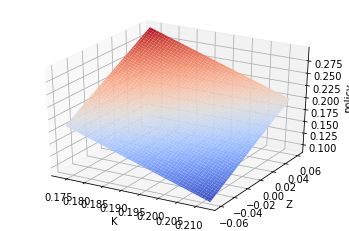

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Kax,Zax, Kprime, cmap='coolwarm')

ax.set_xlabel("K")
ax.set_ylabel("Z")
ax.set_zlabel("policy")

plt.show()

**EXERCISE 2**

In order to solve this exercise we derive the Euler equation (E)

\begin{align}
0 &= E_{t} ln \left[ \beta \frac{\alpha e^{Z_{t+1}} K_{t+1}^{\alpha-1}\left(e^{z_{t}} K_{t}^{\alpha}-K_{t+1}\right)}{e^{z_{t+1}} K_{t+1}^{\alpha}-K_{t+2}} \right] \\
&= E_{t} \left[ 
ln(\beta) 
+ ln \left(\alpha e^{Z_{t+1}} K_{t+1}^{\alpha-1} \right) 
+ ln \left(e^{z_{t}} K_{t}^{\alpha}-K_{t+1}\right) 
- ln \left(e^{z_{t+1}} K_{t+1}^{\alpha}-K_{t+2} \right) 
\right] 
\end{align}

with respect to $K_{t+2}, K_{t+1}, K_{t}, z_{t+1}$ and $z_{t}$. Doing so, and evaluating the expressions at the steady state, we obtain Uhlig's matrices:

\begin{align}
\frac{\partial E}{\partial K_{t+2}} &= \frac{1}{\bar{K}^{\alpha}-\bar{K}} \\
\frac{\partial E}{\partial K_{t+1}} &= \frac{\alpha - 1}{\bar{K}} - \frac{1}{\bar{K}^{\alpha}-\bar{K}} - \frac{\alpha \bar{K}^{\alpha-1}}{\bar{K}^{\alpha}-\bar{K}} \\ 
\frac{\partial E}{\partial K_{t}} &= \frac{\alpha \bar{K}^{\alpha-1}}{\bar{K}^{\alpha}-\bar{K}} \\
\frac{\partial E}{\partial Z_{t+1}} &= 1- \frac{\bar{K}}{\bar{K}^{\alpha}-\bar{K}} \\ 
\frac{\partial E}{\partial Z_{t}} &= \frac{\bar{K}^{\alpha}}{\bar{K}^{\alpha}-\bar{K}}  
\end{align}

In [404]:
#parameter values
β = 0.98
α = 0.35
ρ = 0.95

#basis
A = α*β
K = A**(1/(1 - α))

#characterizing matrices (cf Uhlig)
common = α/(K**α - K)

F = 1 / (K**α - K)
G = (α-1) / (K**α - K) - 1 / (K**α - K) - α* K**(α-1) / (K**α - K)
H = α* K**(α-1) / (K**α - K)
L = 1 - K / (K**α - K)
M = K**α / (K**α - K)
N = ρ

#the solutions
P1 = (-G + np.sqrt(G**2 - 4*F*H)) / (2*F)
P2 = (-G - np.sqrt(G**2 - 4*F*H)) / (2*F)
Q1 = - (L*N + M) / (F*N + F*P1 + G)
Q2 = - (L*N + M) / (F*N + F*P2 + G)

#print output
print("In the steady state:")
print("F =", F)
print("G =", G)
print("H =", H)
print("L =", L)
print("M =", M)
print("N =", N)

print("P1 =", P1)
print("P2 =", P2)
print("Q1 =", Q1)
print("Q2 =", Q2)


In the steady state:
F = 2.708076157015596
G = -7.231668676438586
H = 2.763343017362853
L = 0.4779299847792998
M = 1.5220700152207003
N = 0.95
P1 = 2.20833739123846
P2 = 0.46207077202684593
Q1 = -1.49551915516812
Q2 = 0.5798981353340082


**EXERCISE 4**

Building on the log-lin code provided to us:

In [8]:
def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    l = Y
    z = Z
    
    # truncate labor if necessary
    if l > 0.9999:
        l = 0.9999
    elif l < 0.0001:
        l = 0.0001
    
    # unpack params
    [α, γ, ϵ, β, δ, z_bar, τ, a] = params
    
    # find definintion values
    Y = (k ** α)*((np.exp(z) * l)**(1 - α))
    W = (1-α) * k**α * (np.exp(z))**(1-α) * l**(-α)
    R = α* ((np.exp(z*(1-α))*l)/k)**(1-α) 
    T = τ*(W*l + (R-δ)*k) 
    C = (1-τ)*(W*l + (R - δ)*k) + k + T - kp
    U = (C ** (1 - γ) - 1)/(1 - γ) + a * (((1 - l) ** (1 - ϵ)) - 1)/(1 - ϵ)  

    return Y, W, R, C, U, T

In [104]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    
    # unpack params
    [α, γ, ϵ, β, δ, z_bar, τ, a] = params
    
    # find definitions for now and next period
    l = Y
    if l > 1:
        l = 0.9999
    elif l < 0.0001:
        l = 0.0001
        
    Y, W, R, C, U, T = Modeldefs(Xp, X, Y, Z, params)
    Yp, Wp, Rp, Cp, Up, Tp = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations (note: a=xi and theta=epsilon)
    E2 = a*((1-l)**(-ϵ))-W*(1-τ)*(C**(-γ))
    E1 = ((C**(-γ)) - β*(Cp**(-γ))*((Rp-δ)*(1-τ)+1))
    #E2 = (C**(-γ)*W*(1-τ)) - (a*(1-l)**ϵ)  
    #E2 = a*(l**ϵ)*C**(γ) - W*(1-τ)

    return np.array([E1, E2]) 

In [7]:
# import the modules from LinApp
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_SSL import LinApp_SSL

In [106]:
params = [0.4, 2.5, 1.5, 0.98, 0.1, 0.0, 0.05, 0.5]    #[α, γ, ϵ, β, δ, z_bar, τ, a] 
z_bar=params[5]

In [107]:
# set LinApp parameters
Zbar = np.array([z_bar])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

In [108]:
# take a guess for steady state values of k and ell
guessXY = np.array([1., .5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check SS: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')
    
# find the steady state values for the definitions
Ybar, wbar, rbar, cbar, ubar, tbar = \
    Modeldefs(kbar, kbar, ellbar, 0., params)

# display all steady state values
ibar = params[4]*kbar
print ('kbar:   ', kbar)
print ('ellbar: ', ellbar)
print ('Ybar:   ', Ybar)
print ('wbar:   ', wbar)
print ('rbar:   ', rbar)
print ('cbar:   ', cbar)
print ('ubar:   ', ubar)
print ('tbar:   ', tbar)
print ('ibar:   ', ibar)

check SS:  [-2.582379e-13 -1.760814e-13]
kbar:    4.225229026772408
ellbar:  0.5797914531669488
Ybar:    1.2832261088311188
wbar:    1.3279527683499177
rbar:    0.12148227712156534
cbar:    0.860703206153878
ubar:    -0.7108726381181315
tbar:    0.0430351603076939
ibar:    0.4225229026772408


**EXERCISE 5**

[Still contains a bug]

In [452]:
params = [0.4, 2.5, 1.5, 0.98, 0.1, 0.0, 0.05, 0.5]    #[α, γ, ϵ, β, δ, z_bar, τ, a] 
z_bar=params[5]

# set LinApp parameters
Zbar = np.array([z_bar])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

for i, val in enumerate(params):

    #PART I 
    ##solve model first time for benchmark
    
        # take a guess for steady state values of k and ell
    guessXY = np.array([1., .5])

        # find the steady state values using LinApp_FindSS
    XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
    (kbar, ellbar) = XYbar

        # set up steady state input vector
    theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

        # find the steady state values for the definitions
    Ybar, wbar, rbar, cbar, ubar, tbar = \
        Modeldefs(kbar, kbar, ellbar, 0., params)

        # display all steady state values
    ibar = params[4]*kbar

    
    #PART II 
    ## solve model for comparative statistics    
    params[i] = params[i]+0.1
    
        # take a guess for steady state values of k and ell
    guessXY = np.array([1., .5])

        # find the steady state values using LinApp_FindSS
    XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
    (kbar, ellbar) = XYbar

        # set up steady state input vector
    theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

        # find the steady state values for the definitions
    Ybar2, wbar2, rbar2, cbar2, ubar2, tbar2 = \
        Modeldefs(kbar, kbar, ellbar, 0., params)
    
    # PRINT

    α, γ, ϵ, β, a, δ, z_bar, τ = sy.symbols('α, γ, ϵ, β, a, δ, z_bar, τ')
    list = [α, γ, ϵ, β, δ, z_bar, τ, a]
    
    #print output
    print("\n Hence, the comparative statics wrt", list[i])
    print("for c:", round((cbar2-cbar)/0.1,3) ) 
    print("for w:", round((wbar2-wbar)/0.1,3))
    print("for r:", round((rbar2-rbar)/0.1,3))
    print("for T:", round((tbar2-tbar)/0.1,3))


 Hence, the comparative statics wrt α
for c: 3.037
for w: 7.3
for r: -0.0
for T: 0.152

 Hence, the comparative statics wrt γ
for c: -0.044
for w: -0.0
for r: 0.0
for T: -0.002

 Hence, the comparative statics wrt ϵ
for c: -0.185
for w: -0.0
for r: 0.0
for T: -0.009

 Hence, the comparative statics wrt β
for c: 0.568
for w: 15.539
for r: -0.523
for T: 0.028

 Hence, the comparative statics wrt δ
for c: -5.97
for w: -15.631
for r: 0.528
for T: -0.298

 Hence, the comparative statics wrt z_bar
for c: 0.0
for w: 0.0
for r: 0.0
for T: 0.0

 Hence, the comparative statics wrt τ
for c: -1.558
for w: 1.665
for r: -0.092
for T: 0.368

 Hence, the comparative statics wrt a
for c: -0.058
for w: -0.0
for r: 0.0
for T: -0.009


**EXERCISE 6**

In [11]:
def Modeldyn2(theta0, params):
    
    # unpack theat0
    #print(theta0)
    #(Xpp, lpp, Xp, lp, X, l, Zp, Z) = theta0 #should be lp l and lminus
    (Xpp, Xp,  X, lp, l, Zp, Z) = theta0
    
    # unpack params
    [α, γ, ϵ, β, δ, z_bar, τ, a] = params
    
    # find definitions for now and next period        
    #Y, W, R, C, U, T = Modeldefs(Xp, X, lp, Z, params)
    #Yp, Wp, Rp, Cp, Up, Tp = Modeldefs(Xpp, Xp, lpp, Zp, params)
    
    Y, W, R, C, U, T = Modeldefs(Xp, X, l, Z, params)
    Yp, Wp, Rp, Cp, Up, Tp = Modeldefs(Xpp, Xp, lp, Zp, params)
    
    # Evaluate Euler equations (note: a=xi and theta=epsilon)
    E2 = a*((1-l)**(-ϵ))-W*(1-τ)*(C**(-γ))
    E1 = ((C**(-γ)) - β*(Cp**(-γ))*((Rp-δ)*(1-τ)+1))

    return np.array([E1, E2]) 

In [12]:
params = [0.4, 2.5, 1.5, 0.98, 0.1, 0.0, 0.05, 0.5]    #[α, γ, ϵ, β, δ, z_bar, τ, a] 
z_bar=params[5]

In [13]:
# set LinApp parameters
Zbar = np.array([z_bar])
nx = 1  # number of X variables
ny = 1  # number of Y variables
nz = 1  # number of Z variables
logX = 0  # 1 if log-linearizing, otherwise 0
Sylv = 0  # just set this to 0 for now.

In [14]:
# take a guess for steady state values of k and ell
guessXY = np.array([0.5,0.5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn2, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, 0., 0.])

XYbar:  [4.22522903 0.57979145]


In [15]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Modeldyn2, params, theta0, nx, ny, nz, logX)
np.set_printoptions(suppress=False)
np.set_printoptions(precision=6)

print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

FF:  [[0.]]
GG:  [[-5.331621]]
HH:  [[5.272383]]
LL:  [[0.]]
MM:  [[2.346858]]


In [16]:
# set value for NN 
ρ = 0.9
NN = ρ
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ:', QQ)
print ('RR:', RR)
print ('SS:', SS)

PP: [[0.355426]]
QQ: [[0.281975]]
RR: [[-0.226687]]
SS: [[-0.056613]]


**EXERCISE 9**

In [35]:
sigma = np.sqrt(0.0004)

# set number of observations
nobs = 40 

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
epshist = np.zeros(nobs+1)
epshist[1] = sigma
zhist[0] = epshist[0]
for t in range(1,nobs+1):
    zhist[t] = ρ*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
ell0 = np.array([[ellbar]])

# create a history of k's and ell's using LinApp_SSL
khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
chist = np.zeros(nobs)
uhist = np.zeros(nobs)
thist = np.zeros(nobs)
ihist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], chist[t], uhist[t], thist[t] = \
        Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)
    
    if t ==  0 or t==nobs:    
        ihist[t] = 0.1*k0
    else:
        ihist[t] = khist[t+1] - (1-0.1)*khist[t]
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
ellhist = ellhist[0:nobs]

# plot time series
time = range(0, nobs)


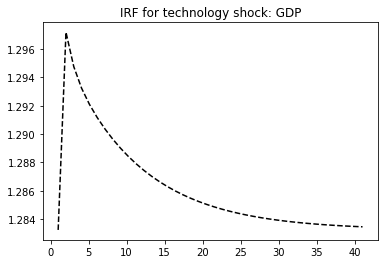

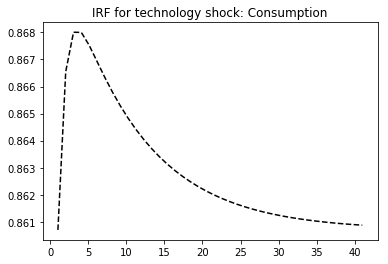

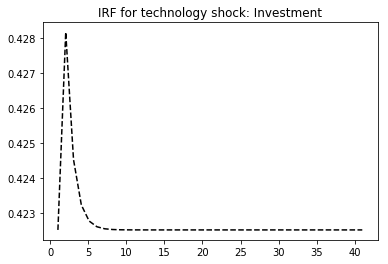

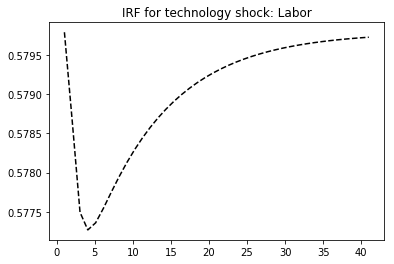

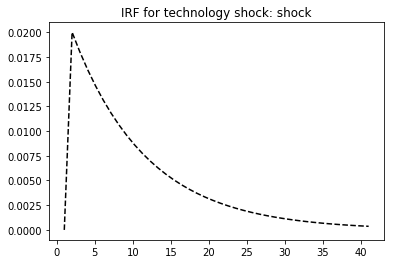

In [36]:
names = np.array(['GDP', 'Consumption', 'Investment', 'Labor', 'shock'])
series = [Yhist, chist, ihist, ellhist, zhist]

for index, s in enumerate(series):
    periods = np.linspace(1, nobs + 1, nobs)
    plt.plot(periods, s[:nobs], 'k--')
    plt.title('IRF for technology shock: %s' %names[index])
    plt.show()

**EXERCISE 7**

In [57]:
σ = np.sqrt(0.0004)
μ = 0
numSims = 10000
numPeriods = 250

Yhist = np.zeros((numSims, numPeriods))
Chist = np.zeros((numSims, numPeriods))
Ihist = np.zeros((numSims, numPeriods))
Khist = np.zeros((numSims, numPeriods))
Lhist = np.zeros((numSims, numPeriods))

for ii in range(numSims):

    # create a history of z's using equation (7)
    zhist = np.zeros(numPeriods+1)
    epshist = np.zeros(numPeriods+1)
    zhist[0] = epshist[0]
    for t in range(1,numPeriods+1):
        epshist[t] = np.random.normal(loc=μ, scale=σ)
        zhist[t] = ρ*zhist[t-1] + epshist[t]

    # LinApp_SSL requires that Zhist be a 2-dimensional array
    Zhist = np.reshape(zhist, (numPeriods+1, 1))

    # Linapp_SSL also requires that starting values be arrays
    k0 = np.array([[kbar]])
    ell0 = np.array([[ellbar]])

    # create a history of k's and ell's using LinApp_SSL
    khist, ellhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

    Yhistn = np.zeros(numPeriods)
    whistn = np.zeros(numPeriods)
    rhistn = np.zeros(numPeriods)
    chistn = np.zeros(numPeriods)
    ihistn = np.zeros(numPeriods)
    uhistn = np.zeros(numPeriods)
    thistn = np.zeros(numPeriods)
    for t in range(0,numPeriods): #Y, W, R, C, U, T
        Yhistn[t], whistn[t], rhistn[t], chistn[t], uhistn[t], thistn[t], = \
            Modeldefs(khist[t+1], khist[t], ellhist[t], zhist[t], params)
  
        if t ==  0 or t==numPeriods:    
            Ihist[ii,t] = 0.1*k0
            Lhist[ii,t] = ellhist[t][:]
        else:
            Ihist[ii,t] = khist[t+1] - (1-0.1)*khist[t]
            Lhist[ii,t] = ellhist[t][0]
    
    Yhist[ii,:] = Yhistn[:]
    Chist[ii,:] = chistn[:]

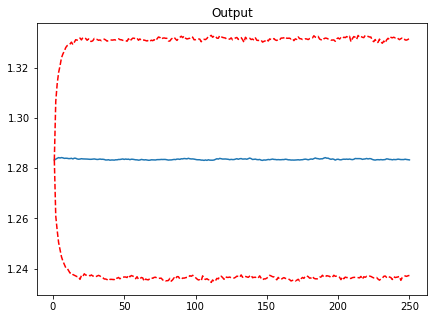

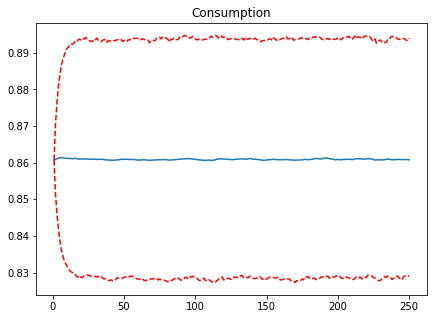

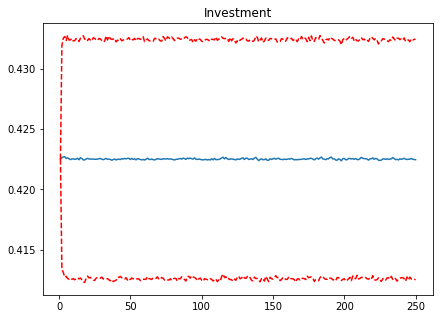

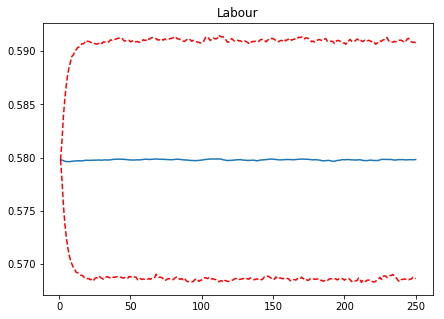

In [59]:
def plot_series(title, series):
    fig = plt.figure(figsize=(7,5))
    t = np.arange(1, 251, 1)
    CI95 = np.percentile(series, 95, axis=0)
    CI5 = np.percentile(series, 5, axis=0)
    mean = np.mean(series, axis=0)
    plt.plot(t, mean, label='Average')
    plt.plot(t, CI95, 'r--', label='95th Percentile')
    plt.plot(t, CI5, 'r--', label='5th Percentile')
    plt.title(title)
    plt.show()

plot_series('Output', Yhist)
plot_series('Consumption', Chist)
plot_series('Investment', Ihist)
plot_series('Labour', Lhist)

**EXERCISE 8**

In [62]:
import pandas as pd
import scipy.stats as stats

varnum = 4

mean = np.empty((varnum,numSims))
volat = np.empty((varnum,numSims))
coefvar = np.empty((varnum,numSims))
relvol = np.empty((varnum,numSims))
persis = np.empty((varnum,numSims))
cyclic = np.empty((varnum,numSims))
    
series = [Yhist, Chist, Ihist, Lhist]

def autocorr(x, t=1):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))

for ii, s in enumerate(series):
    mean[ii, :] = np.mean(s)
    volat[ii, :] = np.std(s)
    coefvar[ii, :] = mean[ii, :] / volat[ii, :]
    relvol[ii, :] = volat[ii, :] / np.std(Yhist)
    for jj in range(numSims):
        temp = pd.Series(s[jj, :])
        persis[ii, jj] = temp.autocorr(1)
        cyclic[ii, jj] = stats.pearsonr(s[jj, :], Yhist[jj, :])[0]

In [63]:
print("(Standard errors are reported in parantheses)")
print('\n')

names = np.array(['output', 'consumption', 'investment', 'labour'])
for index, name in enumerate(names):
    print("For", name)
    print('- Mean =', round(np.mean(mean[index, :]),5), '(', round(stats.sem(mean[index, :]),5), ')')
    print('- Volatility =', round(np.mean(volat[index, :]),5), '(', round(stats.sem(volat[index, :]),5), ')') 
    print('- Coefficient of Variation =', round(np.mean(coefvar[index, :]),5), '(', round(stats.sem(coefvar[index, :]),5), ')')
    print('- Relative Volatility =', round(np.mean(relvol[index, :]),5), '(', round(stats.sem(relvol[index, :]),5), ')')
    print('- Persistence =', round(np.mean(persis[index, :]),5), '(', round(stats.sem(persis[index, :]),5), ')')
    print('- Cyclicality =', round(np.mean(cyclic[index, :]),5), '(', round(stats.sem(cyclic[index, :]),5), ')')
    print('\n')

(Standard errors are reported in parantheses)


For output
- Mean = 1.28351 ( 0.0 )
- Volatility = 0.02864 ( 0.0 )
- Coefficient of Variation = 44.81679 ( 0.0 )
- Relative Volatility = 1.0 ( 0.0 )
- Persistence = 0.85597 ( 0.00037 )
- Cyclicality = 1.0 ( 0.0 )


For consumption
- Mean = 0.86089 ( 0.0 )
- Volatility = 0.01962 ( 0.0 )
- Coefficient of Variation = 43.88498 ( 0.0 )
- Relative Volatility = 0.68497 ( 0.0 )
- Persistence = 0.94179 ( 0.00016 )
- Cyclicality = 0.9726 ( 6e-05 )


For investment
- Mean = 0.42252 ( 0.0 )
- Volatility = 0.00603 ( 0.0 )
- Coefficient of Variation = 70.12245 ( 0.0 )
- Relative Volatility = 0.2104 ( 0.0 )
- Persistence = 0.34658 ( 0.0006 )
- Cyclicality = 0.65272 ( 0.00011 )


For labour
- Mean = 0.57979 ( 0.0 )
- Volatility = 0.00671 ( 0.0 )
- Coefficient of Variation = 86.38084 ( 0.0 )
- Relative Volatility = 0.23436 ( 0.0 )
- Persistence = 0.96126 ( 0.00011 )
- Cyclicality = -0.92724 ( 0.00018 )




# PART III - PERTURBATION

**EXERCISE 2**

Let's code the excess demand function.  This will implicitly define the wage a function of the capital stock when set excess demand to zer0.

In [126]:
def excess(w,k):
    alf = 0.33
    t = 0.5
    z = 1.
    b = 2.
    h = 24.
    
    nd = ((1-alf)*z/w)**k
    pi = z*k**alf * nd**(1-alf) - w*nd
    ns = h - (b/(w*(1+b)))*(w*h + pi - t)
    
    return ns - nd

Next, we need code that generates second derivatives numerically.  The following code generates second and third derivatives.

In [127]:
def Bnumdiff3(funcname, y0, x0, ep):
    fA = funcname(y0+2*ep, x0-ep)
    fB = funcname(y0+2*ep, x0)
    fC = funcname(y0+2*ep, x0+ep)
    fD = funcname(y0+ep, x0-2*ep)
    fE = funcname(y0+ep, x0-ep)
    fF = funcname(y0+ep, x0)
    fG = funcname(y0+ep, x0+ep)
    fH = funcname(y0+ep, x0+2*ep)
    fI = funcname(y0, x0-2*ep)
    fJ = funcname(y0, x0-ep)
    fK = funcname(y0, x0)
    fL = funcname(y0, x0+ep)
    fM = funcname(y0, x0+2*ep)
    fN = funcname(y0-ep, x0-2*ep)
    fP = funcname(y0-ep, x0-ep)
    fQ = funcname(y0-ep, x0)
    fR = funcname(y0-ep, x0+ep)
    fS = funcname(y0-ep, x0+2*ep)
    fT = funcname(y0-2*ep, x0-ep)
    fU = funcname(y0-2*ep, x0)
    fV = funcname(y0-2*ep, x0+ep)

    fx = (fL-fJ)/(2*ep)
    fy = (fF-fQ)/(2*ep)
    fxx = (fL-2*fK-fJ)/(ep**2)
    fxy = (fG-fE-fR+fP)/(ep**2)
    fyy = (fF-2*fK+fQ)/(ep**2)
    fxxx = (fM-2*fL+2*fJ-fI)/(2*ep**3)
    fxxy = (fH-2*fF-fS+fD+2*fQ-fN)/(4*ep**3)
    fxyy = (fA-2*fJ-fC+fT+2*fL-fV)/(4*ep**3)
    fyyy = (fB-2*fF+2*fQ-fU)/(2*ep**3)
    
    return fy, fx, fyy, fxy, fxx, fyyy, fxyy, fxxy, fxxx

Write the main program

w0:  [0.532769]
check:  [-3.552714e-15]


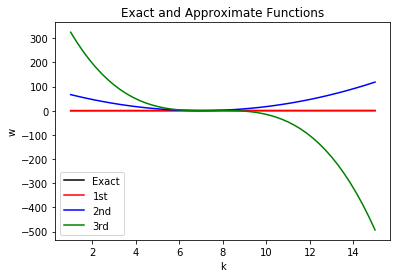

In [128]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# choose approximation point
k0 = 7.

# set value for epsilon
eps = .01

#  create anonymous function
f = lambda w: excess(w, k0)

#  use fsolve to find equlibrium wage
w0 = opt.fsolve(f, .1)
print ('w0: ', w0)

#  check solution
check = excess(w0, k0)
print ('check: ', check)

# get derivatives from numerical differentiator
Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = \
    Bnumdiff3(excess, w0, k0, eps);
     
# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw


# set up a grid
min = 1
max = 15
nstep = 50
kgrid = np.linspace(min, max, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w1grid, 'r-',
         kgrid, w2grid, 'b-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=3)
plt.title('Exact and Approximate Functions')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

w0:  [0.573854]
check:  [5.329071e-15]


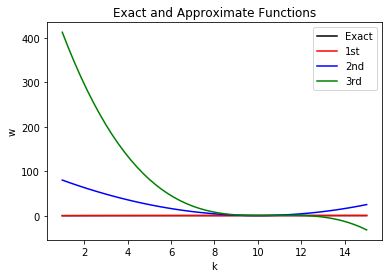

In [129]:
# choose approximation point
k0 = 10.

# set value for epsilon
eps = .01

#  create anonymous function
f = lambda w: excess(w, k0)

#  use fsolve to find equlibrium wage
w0 = opt.fsolve(f, .1)
print ('w0: ', w0)

#  check solution
check = excess(w0, k0)
print ('check: ', check)

# get derivatives from numerical differentiator
Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = \
    Bnumdiff3(excess, w0, k0, eps);
    
# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw


# set up a grid
min = 1
max = 15
nstep = 50
kgrid = np.linspace(min, max, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w1grid, 'r-',
         kgrid, w2grid, 'b-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

**EXERCISE 3**

w0:  [47.465788]
check:  [0.]


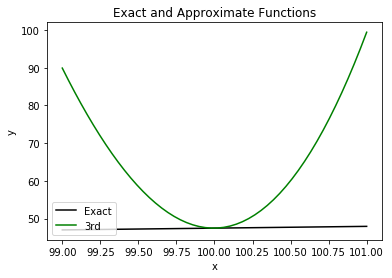

In [141]:
# choose approximation point
k0 = 100

# set value for epsilon
eps = .01

#  create anonymous function
def func3(y, x):
    return (x**(.35) + .9*x - y)**(-2.5) - .95*(y**(.35) + .9*y)**(-2.5)

#  use fsolve to find equlibrium wage
f = lambda w: func3(w, k0)
w0 = opt.fsolve(f, 10)
print ('w0: ', w0)

#  check solution
check = func(w0, k0)
print ('check: ', check)

# get derivatives from numerical differentiator
Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = \
    Bnumdiff3(func3, w0, k0, eps);
   
# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw


# set up a grid
min = 99
max = 101
nstep = 50
kgrid = np.linspace(min, max, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: func3(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '3rd'], loc=3)
plt.title('Exact and Approximate Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [131]:
print(w3grid)

[89.886953 86.637    83.503178 80.487235 77.590918 74.815972 72.164145
 69.637183 67.236833 64.964842 62.822957 60.812923 58.936489 57.195399
 55.591403 54.126245 52.801673 51.619433 50.581272 49.688937 48.944175
 48.348732 47.904354 47.61279  47.475785 47.495085 47.672439 48.009592
 48.508291 49.170283 49.997314 50.991132 52.153483 53.486114 54.99077
 56.6692   58.52315  60.554367 62.764596 65.155586 67.729082 70.486831
 73.430581 76.562077 79.883067 83.395297 87.100514 91.000464 95.096895
 99.391553]


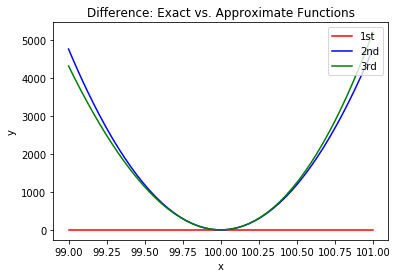

In [120]:
# set up a grid
min = 99
max = 101
nstep = 50

w1diff = np.zeros(nstep)
w2diff = np.zeros(nstep)
w3diff = np.zeros(nstep)
for i in range(0, nstep):
    w1diff[i] = w1grid[i] - wgrid[i]
    w2diff[i] = w2grid[i] - wgrid[i]
    w3diff[i] = w3grid[i] - wgrid[i]

# plot results
plt.plot(kgrid, w1diff, 'r-',
         kgrid, w2diff, 'b-',
         kgrid, w3diff, 'g-')
plt.legend(['1st', '2nd', '3rd'], loc=1)
plt.title('Difference: Exact vs. Approximate Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**EXERCISE 4**

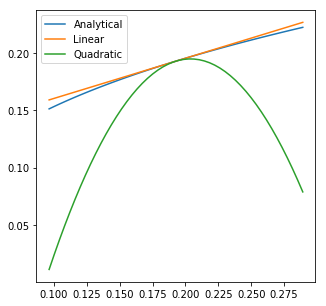

In [148]:
β = 0.98
α = 0.35
kbar = (α * β) ** (1 / (1 - α))

#analytical solution (derivations of Euler equation)
from sympy.solvers import solve
u = sy.Symbol('u') 
x = sy.Function('x')(u) 
y = sy.Function('y')(u) 
xu = sy.Symbol('xu') 
xuu = sy.Symbol('xuu')

F = (1 / (u ** α - x)) - ((β * α * x ** (α - 1)) / (x ** α - y))

dF_du = sy.diff(F, u)
dF_duSubs = dF_du.subs([(sy.diff(x, u), xu), (sy.diff(y, u), xu ** 2), (y, kbar), (x, kbar), (u, kbar)])
xu = float(solve(dF_duSubs)[0])

dF_duu = sy.diff(F, u, 2)
dF_duuSubs = dF_duu.subs([(sy.diff(y, u, 2), (xu + xu ** 2) * xuu), (sy.diff(x, u, 2), xuu), 
                      (sy.diff(y, u), xu ** 2), (sy.diff(x, u), xu), 
                      (y, kbar), (x, kbar), (u, kbar)])
xuu = float(solve(dF_duuSubs)[0])

#resulting policy functions:
def analytical(k):
    return α * β * (k ** α)

def linear(k, kbar, xu):
    return kbar + kbar * xu * ((k - kbar) / kbar) 

def quadratic(k, kbar, xu, xuu):
    return kbar + kbar * xu * ((k - kbar) / kbar) + 0.5 * xuu * ((k - kbar) / kbar) ** 2 

# Plot policy
kGrid = np.linspace(0.5 * kbar, 1.5 * kbar, 50)
fig = plt.figure(figsize=(5, 5))
plt.plot(kGrid, analytical(kGrid), label='Analytical')
plt.plot(kGrid, linear(kGrid, kbar, xu), label='Linear')
plt.plot(kGrid, quadratic(kGrid, kbar, xu, xuu), label='Quadratic')
plt.legend()
plt.show()